In [4]:
!pip install qiskit ipywidgets

!pip install pylatexenc

!pip install matplotlib

In [5]:
import numpy

a = numpy.array([2, 5, 9])
a

array([2, 5, 9])

In [6]:
b = numpy.array(3)
c = numpy.array(4)
b, c

(array(3), array(4))

In [7]:
b + c

np.int64(7)

In [8]:
a.dtype

dtype('int64')

In [9]:
a.shape

(3,)

In [10]:
numpy.mean(a)

np.float64(5.333333333333333)

In [11]:
import qiskit
print(qiskit.__version__)

1.2.0


In [12]:
import math
from qiskit import QuantumCircuit

qc = QuantumCircuit(4)

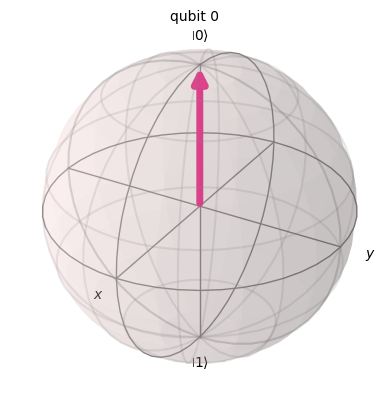

In [13]:
from qiskit.quantum_info import Statevector

qc = QuantumCircuit(1)
state = Statevector.from_instruction(qc)
state.draw('bloch')

In [14]:
qc.h(0)

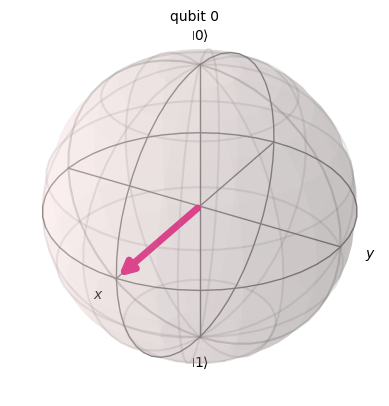

In [15]:
state = Statevector.from_instruction(qc)
state.draw('bloch')

In [16]:
qc.s(0)

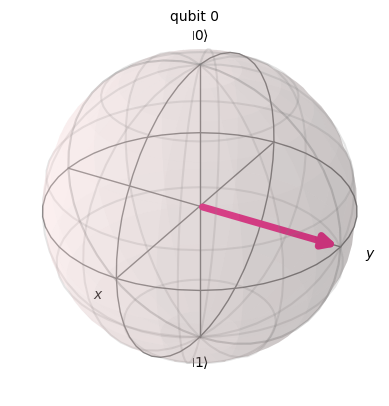

In [17]:
state = Statevector.from_instruction(qc)
state.draw('bloch')

In [18]:
qc.sdg(0)

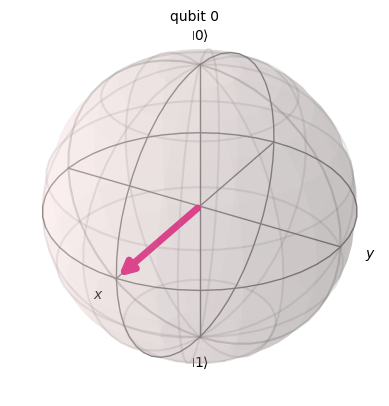

In [19]:
state = Statevector.from_instruction(qc)
state.draw('bloch')

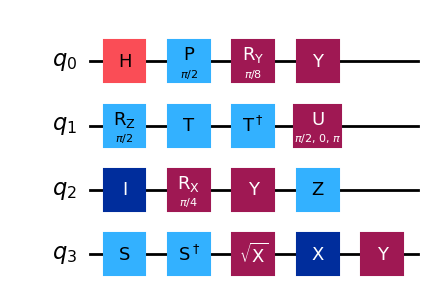

In [20]:
qc = QuantumCircuit(4)
qc.h(0)
qc.id(2)
qc.p(math.pi/2, 0)
qc.rx(math.pi/4, 2)
qc.ry(math.pi/8, 0)
qc.rz(math.pi/2, 1)
qc.s(3)
qc.sdg(3)
qc.sx(3)
qc.t(1)
qc.tdg(1)
qc.u(math.pi/2, 0, math.pi, 1)
qc.x(3)
qc.y([0, 2, 3])
qc.z(2)

qc.draw('mpl')

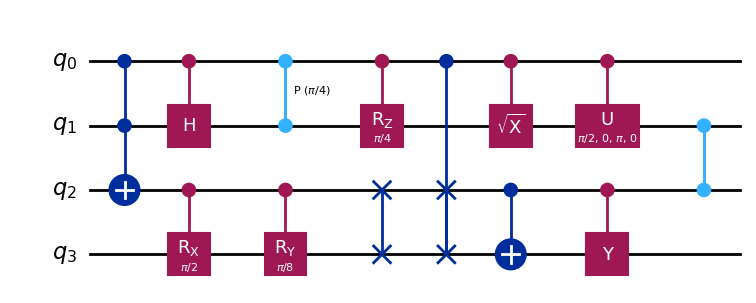

In [21]:
qc = QuantumCircuit(4)

qc.ccx(0, 1, 2)
qc.ch(0, 1)
qc.cp(math.pi/4, 0, 1)
qc.crx(math.pi/2, 2, 3)
qc.cry(math.pi/8, 2, 3)
qc.crz(math.pi/4, 0, 1)
qc.swap(2, 3)
qc.cswap(0, 2, 3)
qc.csx(0, 1)
qc.cu(math.pi/2, 0, math.pi, 0, 0, 1)
qc.cx(2, 3)
qc.cy(2, 3)
qc.cz(1, 2)
qc.draw('mpl')

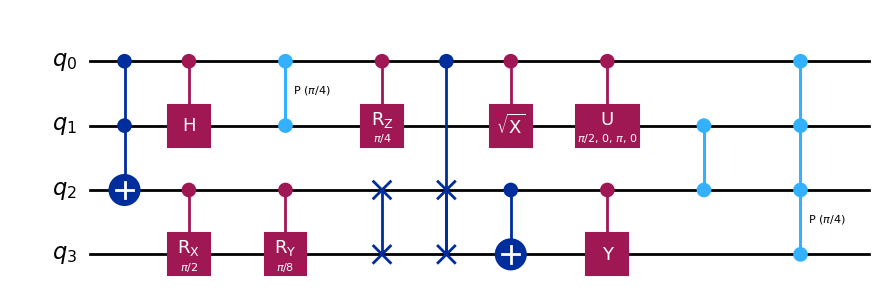

In [22]:
qc.mcp(math.pi/4, [0, 1, 2], 3)
qc.draw('mpl')

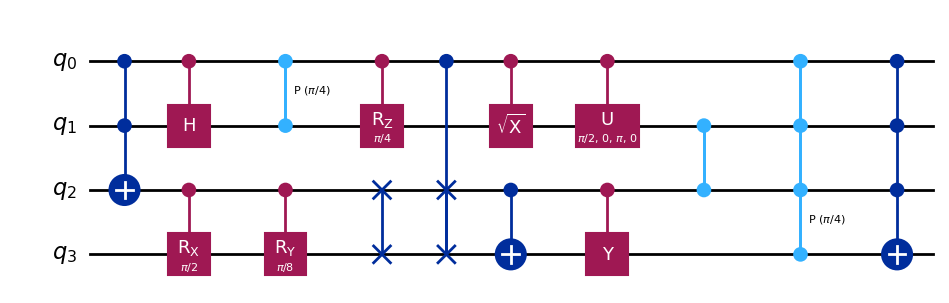

In [23]:
qc.mcx([0, 1, 2], 3)
qc.draw('mpl')

In [24]:
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)
qc.draw()

┌───┐          
q_0: ┤ H ├──■────■──
     └───┘┌─┴─┐  │  
q_1: ─────┤ X ├──┼──
          └───┘┌─┴─┐
q_2: ──────────┤ X ├
               └───┘

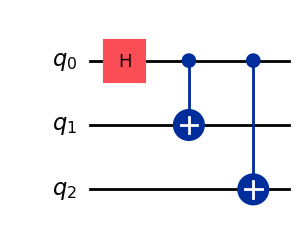

In [25]:
qc.draw('mpl')

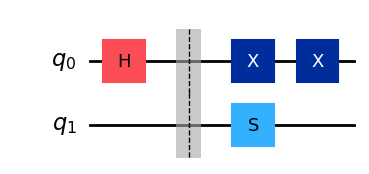

In [26]:
qc = QuantumCircuit(2)
qc.h(0)
qc.barrier()
qc.x(0)
qc.x(0)
qc.s(1)
qc.draw('mpl')

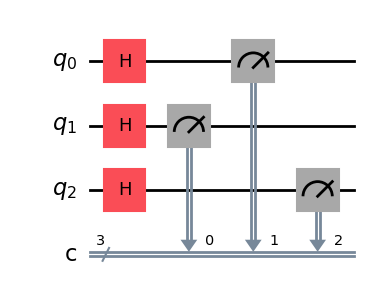

In [27]:
qc = QuantumCircuit(3, 3)
qc.h([0, 1, 2])
qc.measure([1, 0, 2], [0, 1, 2])
qc.draw('mpl')

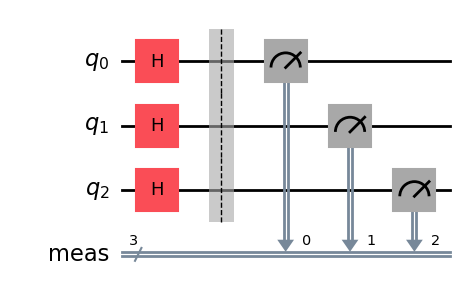

In [28]:
qc = QuantumCircuit(3)

qc.h([0, 1, 2])
qc.measure_all()

qc.draw('mpl')

In [29]:
print(f"depth of the circuit is: {qc.depth()}")
print(f"total number of circuit's gate is: {qc.size()}")
print(f"total number of circuit's wires is: {qc.width()}")

depth of the circuit is: 2
total number of circuit's gate is: 6
total number of circuit's wires is: 6


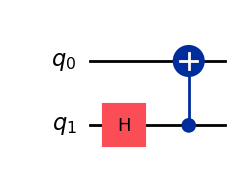

In [30]:
from qiskit.circuit.library import CXGate

qc = QuantumCircuit(2)
qc.h(1)
cx_gate = CXGate()
qc.append(cx_gate, [1, 0])
qc.draw('mpl')

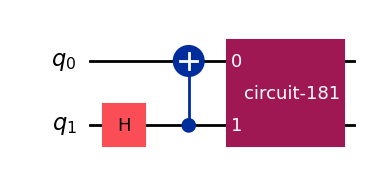

In [31]:
qc2 = QuantumCircuit(2)
qc2.x(0)
qc2.y(1)
qc.append(qc2, [0, 1])
qc2.draw('mpl')
qc.draw('mpl')

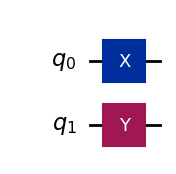

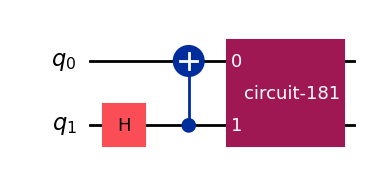

In [32]:
display(qc2.draw('mpl'))
display(qc.draw('mpl'))

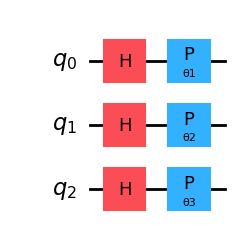

In [33]:
from qiskit.circuit import QuantumCircuit, Parameter

theta1 = Parameter('θ1')
theta2 = Parameter('θ2')
theta3 = Parameter('θ3')

qc = QuantumCircuit(3)
qc.h([0, 1, 2])
qc.p(theta1, 0)
qc.p(theta2, 1)
qc.p(theta3, 2)

qc.draw("mpl")

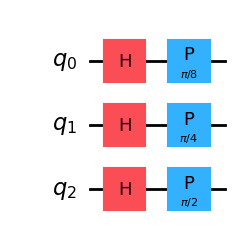

In [34]:
b_qc = qc.assign_parameters({
    theta1: math.pi/8,
    theta2: math.pi/4,
    theta3: math.pi/2,
})
b_qc.draw('mpl')

First quantum circuit


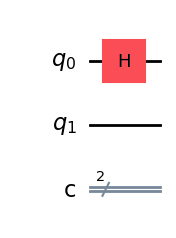

Second quantum circuit


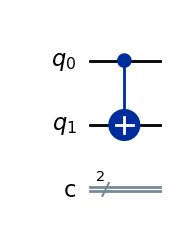

Composed quantum circuit


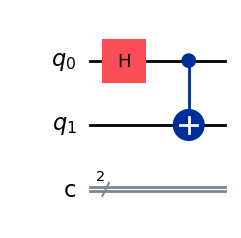

In [35]:
qc = QuantumCircuit(2, 2)
qc.h(0)
print("First quantum circuit")
display(qc.draw('mpl'))

another_qc = QuantumCircuit(2, 2)
another_qc.cx(0, 1)
print("Second quantum circuit")
display(another_qc.draw('mpl'))

bell_qc = qc.compose(another_qc)
print('Composed quantum circuit')
bell_qc.draw('mpl')

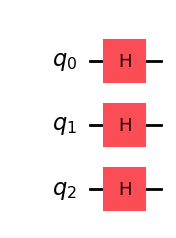

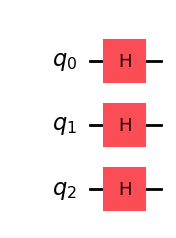

In [36]:
qc = QuantumCircuit(3)
qc.h([0, 1, 2])
new_qc = qc.copy()
display(qc.draw('mpl'))
new_qc.draw('mpl')

the original quantum circuit


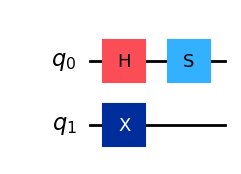

the decomposed circuit


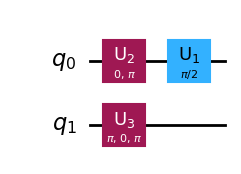

In [37]:
qc = QuantumCircuit(2)
qc.h(0)
qc.s(0)
qc.x(1)
print("the original quantum circuit")
display(qc.draw('mpl'))

decomposed_qc = qc.decompose()
print('the decomposed circuit')
decomposed_qc.draw('mpl')

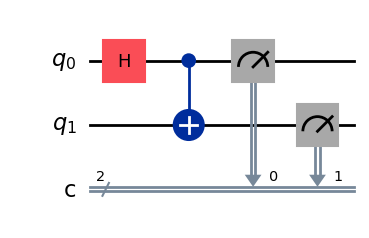

In [38]:
qasm_str = """
OPENQASM 2.0;            // Specify the version of OpenQASM being used
include "qelib1.inc";    // Include the standard quantum gate library
qreg q[2];               // Declare a quantum register with 2 qubits
creg c[2];               // Declare a classical register with 2 bits
h q[0];                  // Apply a Hadamard gate to the first qubit (index 0)
cx q[0],q[1];            // Apply a CNOT gate with the first qubit as control and the second as target
measure q[0] -> c[0];    // Measure the first qubit and store the result in the first classical bit
measure q[1] -> c[1];    // Measure the second qubit and store the result in the second classical bit
"""

new_qc = QuantumCircuit.from_qasm_str(qasm_str)
new_qc.draw('mpl')

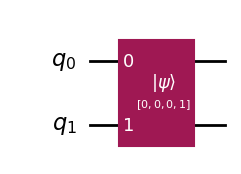

In [39]:
qc = QuantumCircuit(2)
qc.initialize([0, 0, 0, 1])
qc.draw('mpl')

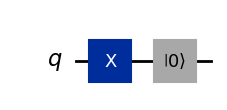

In [40]:
qc = QuantumCircuit(1)
qc.x(0)
qc.reset(0)
qc.draw('mpl')

In [41]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qasm_str = qiskit.qasm3.dumps(qc)
print(qasm_str)

OPENQASM 3.0;
include "stdgates.inc";
bit[2] c;
qubit[2] q;
h q[0];
cx q[0], q[1];



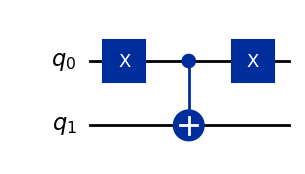

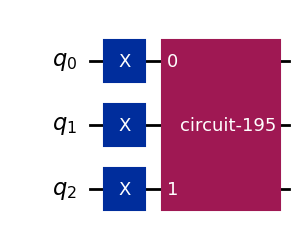

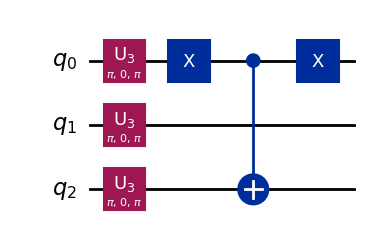

In [42]:
anti_cnot_qc = QuantumCircuit(2)
anti_cnot_qc.x(0)
anti_cnot_qc.cx(0, 1)
anti_cnot_qc.x(0)
display(anti_cnot_qc.draw('mpl'))

anti_cnot_gate = anti_cnot_qc.to_gate()

qc = QuantumCircuit(3)
qc.x([0, 1, 2])
qc.append(anti_cnot_gate, [0, 2])
display(qc.draw('mpl'))
qc.decompose().draw('mpl')